In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv
/kaggle/input/email-classification-ham-spam/email_classification.csv
/kaggle/input/email-spam-classification-dataset/combined_data.csv
/kaggle/input/spam-email-dataset/emails.csv


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    words = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    
    # Join the words back into a string
    return ' '.join(filtered_words)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /kaggle/working/corpora/wordnet.zip


replace /kaggle/working/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [6]:
# load dataset

data1 = pd.read_csv('/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv', encoding='latin-1').iloc[:,1:3]  # label,text
data2 = pd.read_csv('/kaggle/input/spam-email-dataset/emails.csv', encoding='latin-1') # text,spam
data3 = pd.read_csv('/kaggle/input/email-spam-classification-dataset/combined_data.csv', encoding='latin-1').rename(columns={"label":"spam"}).iloc[10000:20022,:] # label,text
data4 = pd.read_csv('/kaggle/input/email-classification-ham-spam/email_classification.csv', encoding='latin-1').rename(columns={"email":"text"}) # label,text

# lable incode spam ham
data1['spam'] = LabelEncoder().fit_transform(data1['label'])
data4['spam'] = LabelEncoder().fit_transform(data4['label'])

# # select
data1 = data1.iloc[:, -2:]
data2 = data2.iloc[:, -2:]
data3 = data3.iloc[:, ::-1]
data4 = data4.drop(["label"],axis=1)

# print(data)

# concat data1 and data2
data = pd.concat([data1, data2,data3,data4], ignore_index=True)
del data1
del data2
del data3
del data4
data['text'] = data['text'].apply(preprocess_text)


print(data)

                                                    text  spam
0      subject enron methanol meter 988291 follow not...     0
1      subject hpl nom january 9 2001 see attached fi...     0
2      subject neon retreat ho ho ho around wonderful...     0
3      subject photoshop window office cheap main tre...     1
4      subject indian spring deal book teco pvr reven...     0
...                                                  ...   ...
21095       pleased inform refund processed successfully     0
21096  get rich quick invest revolutionary new scheme...     1
21097  free trial period ending soon upgrade continue...     0
21098           order way track shipment realtime update     0
21099  limitedtime offer get 50 purchase today dont miss     1

[21100 rows x 2 columns]


In [12]:
print(data.isnull().any())
print(data.tail())

text    False
spam    False
dtype: bool
                                                    text  spam
11073  We're pleased to inform you that your refund h...     0
11074  Get rich quick! Invest in our revolutionary ne...     1
11075  Your free trial period is ending soon. Upgrade...     0
11076  Your order is on its way! Track your shipment ...     0
11077  Limited-time offer! Get 50% off on all purchas...     1


In [7]:
# vectorize text data

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data['text'])

# print(X.toarray())


X_train, X_test, y_train, y_test = train_test_split(X.toarray(), data['spam'].values.reshape(-1, 1), test_size=0.2, random_state=42)


In [8]:
model = MultinomialNB()

model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

0.9727488151658767
[[2596   43]
 [  72 1509]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2639
           1       0.97      0.95      0.96      1581

    accuracy                           0.97      4220
   macro avg       0.97      0.97      0.97      4220
weighted avg       0.97      0.97      0.97      4220



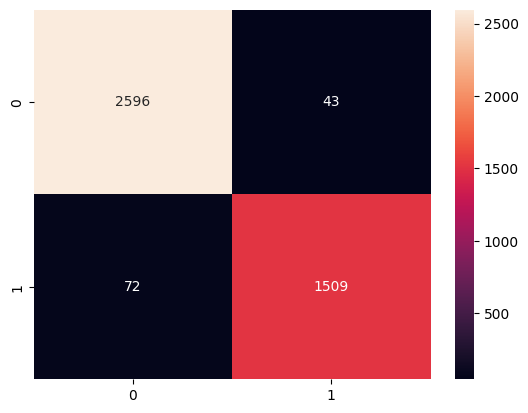

In [9]:
print(model.score(X_test, y_test))

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')

# classification report

print(classification_report(y_test, y_pred))

### Export

In [10]:
import joblib

# Save the model and vectorizer
joblib.dump(model, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']